In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("./data/cruise_ship_info.csv")


In [4]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


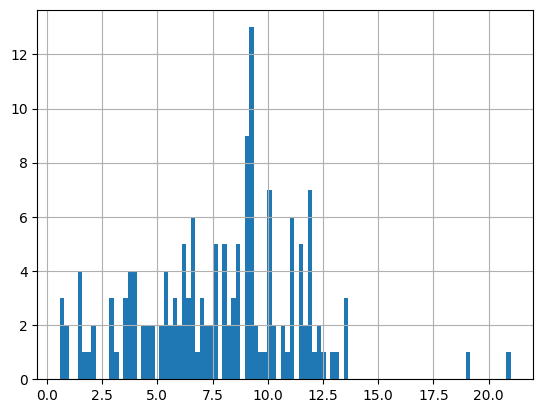

In [5]:
df["crew"].hist(bins=100)
plt.show()

In [6]:
vis_df = df.iloc[:, 1:]
vis_df.head()

,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


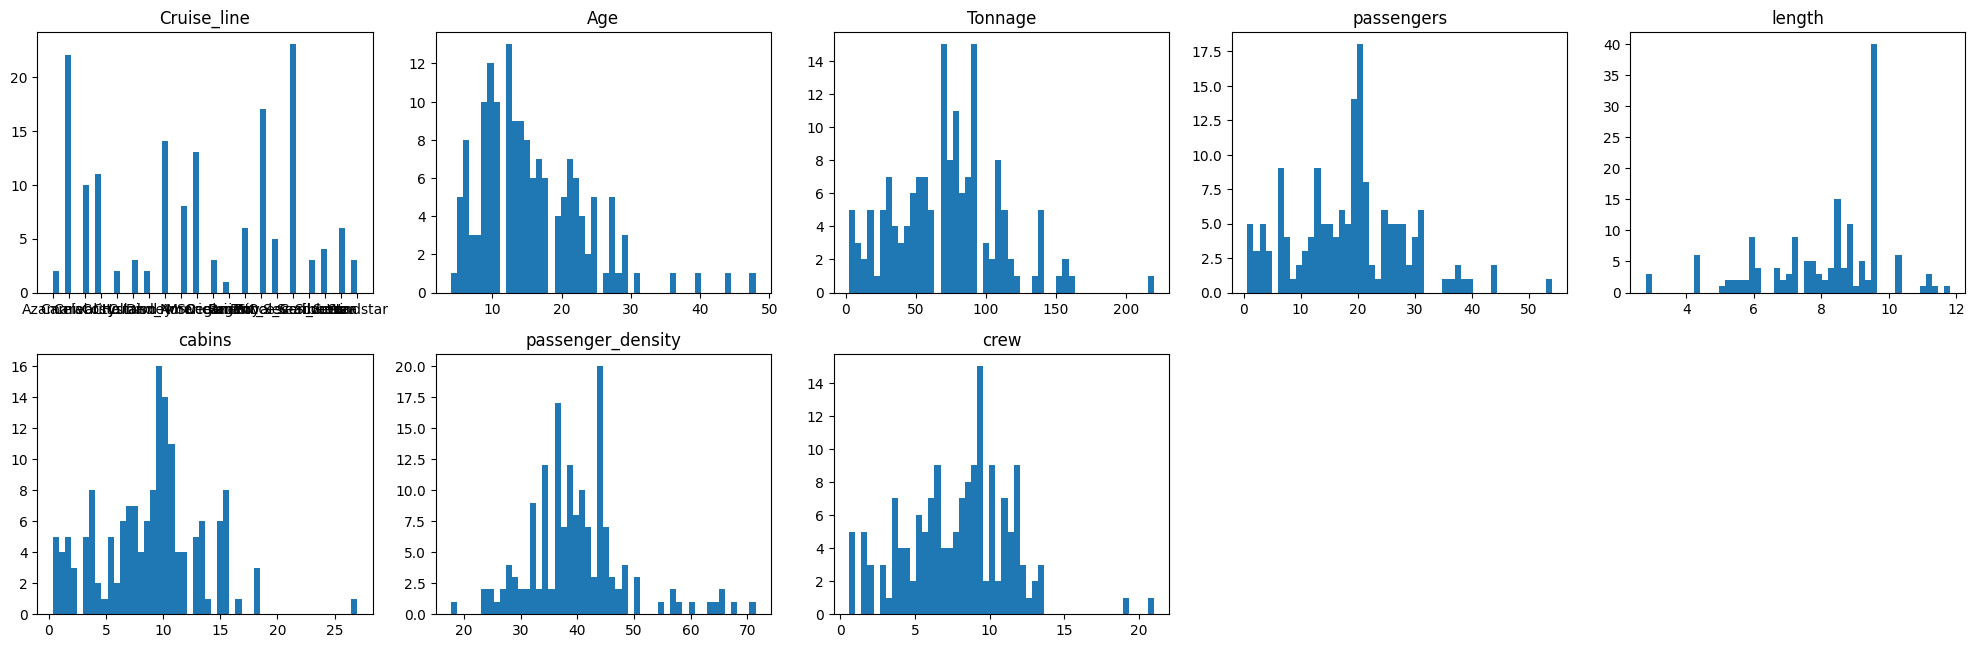

In [7]:
fig = plt.figure(figsize = (20, 16))

for i in range(len(vis_df.columns)):
    ax = fig.add_subplot(5, 5, i + 1)
    plt.hist(vis_df[vis_df.columns[i]], bins = 50)
    ax.set_title(vis_df.columns[i])
    
plt.tight_layout()
plt.show()

In [60]:
scale_col = df.columns[2:-1].tolist()


df.columns[2:-1].tolist()

['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density']

In [61]:
scale_col

['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density']

In [62]:
ss = StandardScaler()

In [63]:
scaled_df = ss.fit_transform(df[scale_col])

In [64]:
scaled_df

array([[-1.27640208e+00, -1.10498441e+00, -1.19395611e+00,
        -1.22533080e+00, -1.18458832e+00,  3.18056583e-01],
       [-1.27640208e+00, -1.10498441e+00, -1.19395611e+00,
        -1.22533080e+00, -1.18458832e+00,  3.18056583e-01],
       [ 1.35810515e+00, -6.47310033e-01, -3.72926345e-01,
        -5.09362635e-01, -3.14095387e-01, -9.40676396e-01],
       [-6.17775272e-01,  1.04321543e+00,  1.16961443e+00,
         7.82736160e-01,  1.35734078e+00, -3.38017340e-01],
       [ 1.72576898e-01,  8.10215117e-01,  8.25445390e-01,
         4.41532582e-01,  9.82669853e-01, -1.78933929e-01],
       [ 8.31203706e-01, -2.47273742e-02,  2.13819677e-01,
         2.34573035e-01,  3.07364771e-01, -6.51539392e-01],
       [-9.08738254e-02, -2.47273742e-02,  2.13819677e-01,
         2.34573035e-01,  3.07364771e-01, -6.51539392e-01],
       [ 9.62929067e-01, -2.47273742e-02,  2.17966292e-01,
         2.34573035e-01,  3.11851848e-01, -6.58506549e-01],
       [ 4.36027621e-01, -2.47273742e-02,  2.138

In [65]:
scaled_df = pd.DataFrame(scaled_df, columns=scale_col)

In [66]:
scaled_df.head()

,Age,Tonnage,passengers,length,cabins,passenger_density
0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057
1,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057
2,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676
3,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017
4,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934


In [67]:
scaled_df = pd.concat([df["Cruise_line"], scaled_df], axis=1)

In [68]:
scaled_df.head()

,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density
0,Azamara,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057
1,Azamara,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057
2,Carnival,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676
3,Carnival,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017
4,Carnival,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934


One Hot Encoding for the Cruise_line columns

In [69]:
scaled_df["Cruise_line"].unique()

array(['Azamara', 'Carnival', 'Celebrity', 'Costa', 'Crystal', 'Cunard',
       'Disney', 'Holland_American', 'MSC', 'Norwegian', 'Oceania',
       'Orient', 'P&O', 'Princess', 'Regent_Seven_Seas',
       'Royal_Caribbean', 'Seabourn', 'Silversea', 'Star', 'Windstar'],
      dtype=object)

In [70]:
ohe = OneHotEncoder()

In [71]:
cl_array = np.array(scaled_df["Cruise_line"])

In [72]:
cl_array = np.reshape(cl_array, (-1, 1))

In [73]:
cl_name = ohe.fit_transform(cl_array)

In [74]:
ohe.get_feature_names_out()

array(['x0_Azamara', 'x0_Carnival', 'x0_Celebrity', 'x0_Costa',
       'x0_Crystal', 'x0_Cunard', 'x0_Disney', 'x0_Holland_American',
       'x0_MSC', 'x0_Norwegian', 'x0_Oceania', 'x0_Orient', 'x0_P&O',
       'x0_Princess', 'x0_Regent_Seven_Seas', 'x0_Royal_Caribbean',
       'x0_Seabourn', 'x0_Silversea', 'x0_Star', 'x0_Windstar'],
      dtype=object)

In [75]:
ohe_cl_name_df = pd.DataFrame(cl_name.toarray(), columns=ohe.get_feature_names_out())

In [76]:
ohe_cl_name_df.head()

,x0_Azamara,x0_Carnival,x0_Celebrity,x0_Costa,x0_Crystal,x0_Cunard,x0_Disney,x0_Holland_American,x0_MSC,x0_Norwegian,x0_Oceania,x0_Orient,x0_P&O,x0_Princess,x0_Regent_Seven_Seas,x0_Royal_Caribbean,x0_Seabourn,x0_Silversea,x0_Star,x0_Windstar
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
scaled_df = pd.concat([ohe_cl_name_df, scaled_df], axis=1)

In [78]:
scaled_df.head()

,x0_Azamara,x0_Carnival,x0_Celebrity,x0_Costa,x0_Crystal,x0_Cunard,x0_Disney,x0_Holland_American,x0_MSC,x0_Norwegian,...,x0_Silversea,x0_Star,x0_Windstar,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Azamara,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Azamara,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Carnival,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Carnival,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Carnival,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934


In [79]:
scaled_df = scaled_df.drop("Cruise_line", axis=1)

In [82]:
x = scaled_df.iloc[:, :-1]
y = df["crew"]

In [83]:
x.head()

,x0_Azamara,x0_Carnival,x0_Celebrity,x0_Costa,x0_Crystal,x0_Cunard,x0_Disney,x0_Holland_American,x0_MSC,x0_Norwegian,...,x0_Royal_Caribbean,x0_Seabourn,x0_Silversea,x0_Star,x0_Windstar,Age,Tonnage,passengers,length,cabins
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.358105,-0.647310,-0.372926,-0.509363,-0.314095
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.617775,1.043215,1.169614,0.782736,1.357341
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.172577,0.810215,0.825445,0.441533,0.982670


In [84]:
y.head()

0     3.55
1     3.55
2     6.70
3    19.10
4    10.00
Name: crew, dtype: float64

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=12)

In [86]:
lr = LinearRegression()

In [87]:
lr.fit(x_train, y_train)

LinearRegression()

In [88]:
lr.coef_

array([-1.86077023e-03,  2.02149960e-01,  3.76405187e-01, -5.20588453e-01,
       -7.27987638e-02, -1.01139196e-01,  5.72203894e-01, -6.62333025e-01,
       -1.65207013e-01,  2.65922604e-01,  4.31866336e-01, -6.41478820e-01,
       -8.69062697e-02, -1.51407697e-01,  4.01276083e-01, -1.29911039e+00,
        1.76306585e-01,  1.64054872e-01,  1.54057562e+00, -4.27930746e-01,
        8.29570276e-02,  7.43061820e-01, -9.83707578e-01,  7.53766538e-01,
        3.16370591e+00])

In [89]:
lr.intercept_

7.975617756254659

In [90]:
lr.score(x_test, y_test)

0.9635311422252942

In [91]:
pred = lr.predict(x_test)

In [92]:
mse = mean_squared_error(y_test, pred)

In [93]:
mse

0.40076032028873887

In [94]:
import statsmodels.api as sm

In [95]:
x = sm.add_constant(x)

In [96]:
model = sm.OLS(y, x)

In [97]:
model = model.fit()

In [98]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crew   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     99.87
Date:                Thu, 23 May 2024   Prob (F-statistic):           3.43e-73
Time:                        19:36:55   Log-Likelihood:                -189.09
No. Observations:                 158   AIC:                             428.2
Df Residuals:                     133   BIC:                             504.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.5976      0.112     67.985      0.000       7.377       7.819
x0_Azamara               0.3804      0.650      0.585      0.559      -0.906       1.666
x0_Carnival              0.4874      0.257      1.899      0.060      -0.020       0.995
x0_Celebrity             0.7847      0.291      2.695      0.008       0.209       1.361
x0_Costa                -0.1381      0.280     -0.492      0.623      -0.693       0.417
x0_Crystal               0.4678      0.613      0.763      0.447      -0.745       1.681
x0_Cunard                0.2982      0.560      0.533      0.595      -0.809       1.405
x0_Disney                0.9146      0.622      1.471      0.144      -0.315       2.145
x0_Holland_American     -0.2685      0.245     -1.096      0.275      -0.753       0.216
x0_MSC                   0.1550      0.330      0.470      0.639      -0.498       0.808
x0_Norwegian             0.5847      0.270      2.168      0.032       0.051       1.118
x0_Oceania               0.8554      0.512      1.670      0.097      -0.158       1.868
x0_Orient               -0.1462      0.915     -0.160      0.873      -1.956       1.664
x0_P&O                   0.1960      0.365      0.536      0.593      -0.527       0.919
x0_Princess              0.2294      0.242      0.948      0.345      -0.249       0.708
x0_Regent_Seven_Seas     0.8685      0.430      2.018      0.046       0.017       1.720
x0_Royal_Caribbean      -0.9212      0.270     -3.409      0.001      -1.456      -0.387
x0_Seabourn              0.6890      0.530      1.301      0.196      -0.359       1.737
x0_Silversea             0.5432      0.464      1.172      0.243      -0.374       1.460
x0_Star                  1.5903      0.389      4.089      0.000       0.821       2.360
x0_Windstar              0.0269      0.513      0.052      0.958      -0.987       1.041
Age                      0.0541      0.115      0.471      0.638      -0.173       0.281
Tonnage                  0.5509      0.362      1.522      0.131      -0.165       1.267
passengers              -0.9559      0.360     -2.653      0.009      -1.668      -0.243
length                   0.8682      0.216      4.022      0.000       0.441       1.295
cabins                   3.2312      0.410      7.874      0.000       2.419       4.043
==============================================================================
Omnibus:                      174.016   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6006.563
Skew:                           4.012   Prob(JB):                         0.00
Kurtosis:                      32.121   Cond. No.                     2.89e+15
==============================================================================

Notes:
[1] Standard Errors 

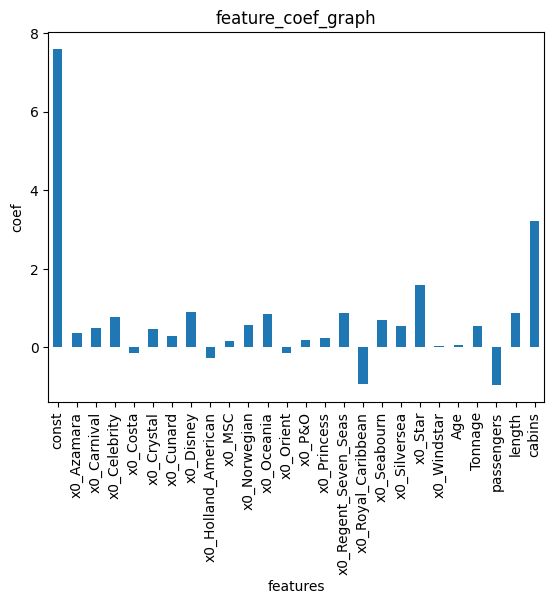

In [99]:
coefs = model.params.tolist()
coefs_se = pd.Series(coefs)

x_labels = model.params.index.tolist()

ax = coefs_se.plot(kind = "bar")
ax.set_title("feature_coef_graph")
ax.set_xlabel("features")
ax.set_ylabel("coef")
ax.set_xticklabels(x_labels)
plt.show()

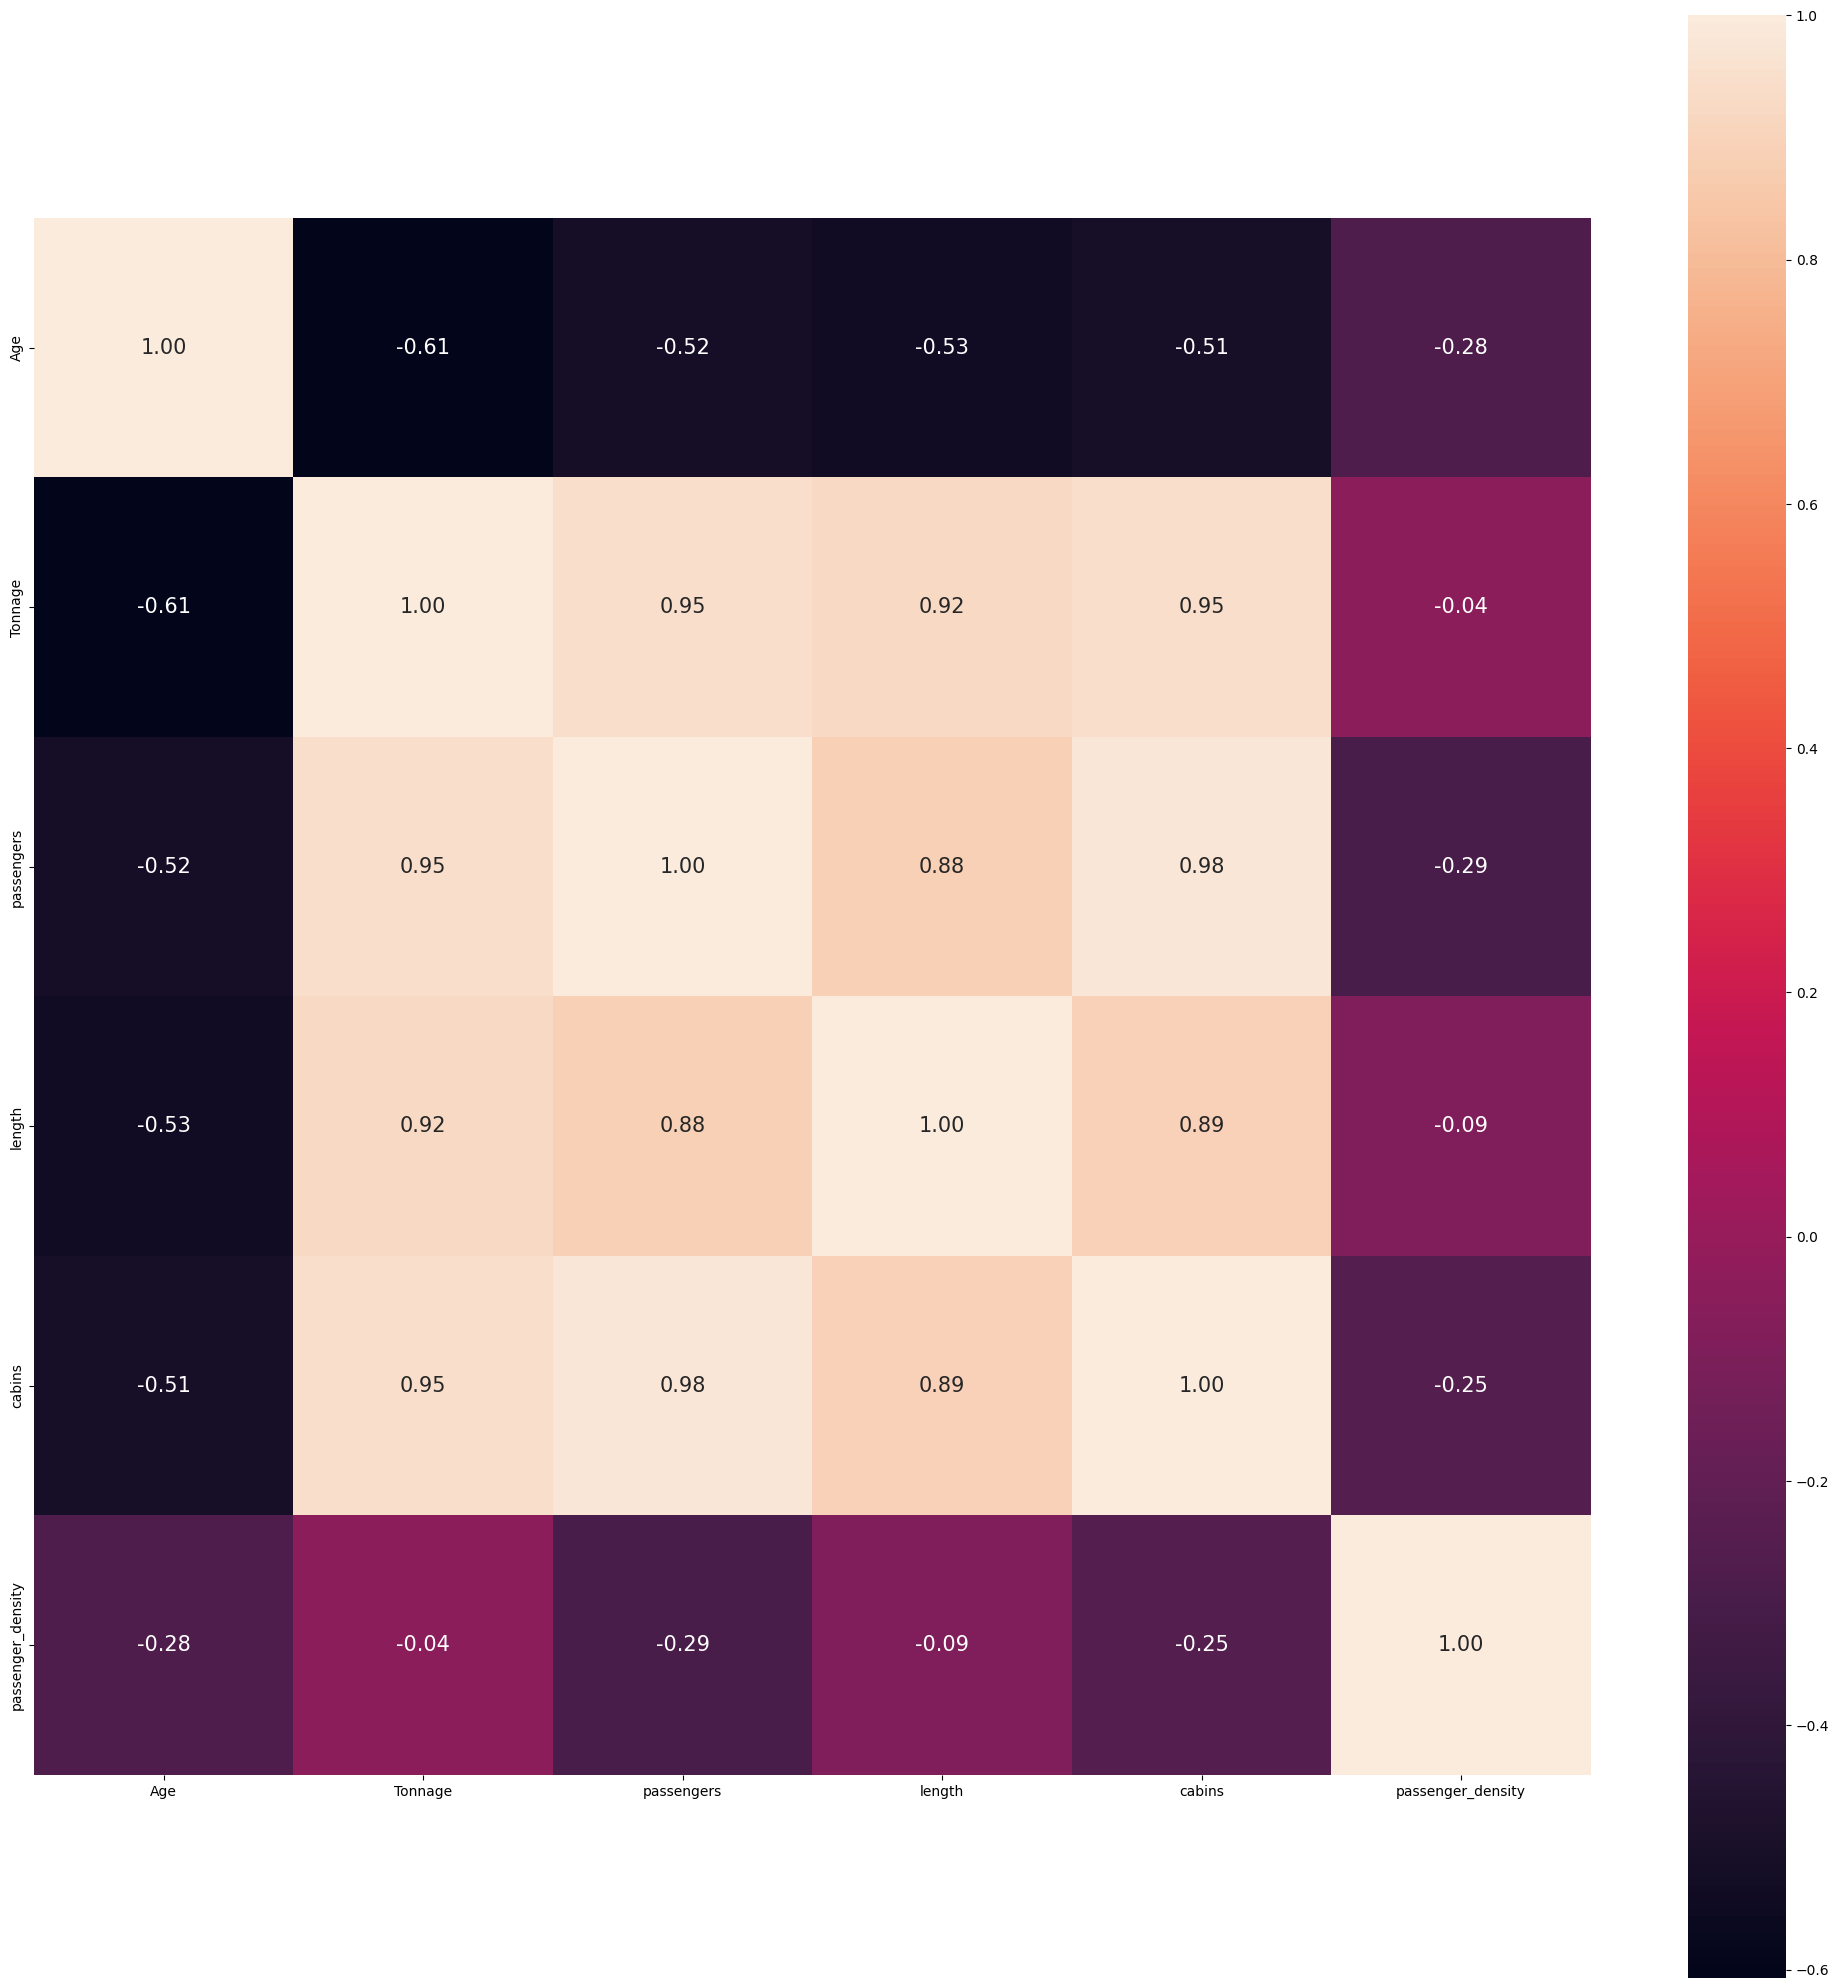

In [100]:
corr = scaled_df[scale_col].corr()
plt.figure(figsize = (20, 20))
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = ".2f",
                 annot_kws = {"size" : 15}, yticklabels = scale_col, xticklabels = scale_col)

plt.tight_layout()
plt.show()

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["feature"] = x.columns
vif.round(1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,inf,x0_Azamara
2,inf,x0_Carnival
3,inf,x0_Celebrity
4,inf,x0_Costa
5,inf,x0_Crystal
6,inf,x0_Cunard
7,inf,x0_Disney
8,inf,x0_Holland_American
9,inf,x0_MSC


In [103]:
scaled_df = scaled_df.drop("Age", axis=1)

In [104]:
scaled_df = scaled_df.drop("Tonnage", axis=1)

In [110]:
x = scaled_df.iloc[:, :-1]
y = df["crew"]

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=12)

In [112]:
final_lr = LinearRegression()
final_lr.fit(x_train, y_train)

LinearRegression()

In [113]:
final_lr.intercept_

8.030450997056567

In [114]:
final_lr.score(x_test, y_test)

0.9685018792401047

In [115]:
pred = final_lr.predict(x_test)

In [116]:
mse = mean_squared_error(y_test, pred)

In [117]:
mse

0.34613634027727325